In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
friday_am_df = pd.read_csv('/Users/jessicawoo/Desktop/cs506/wfh/6month_friday_am.csv')
wkstation_df = pd.read_csv('/Users/jessicawoo/Desktop/cs506/wfh/computer_workstation.csv')

In [ ]:
wkstation_15 = wkstation_df[['mbl_cod','local_time','POSTURE_TRAINING', 'METHODS_TRAINING', 
                               'WMSD_SIGNS', 'WORKSTATION_ADJUSTMENT']]
friAM_discomfort = friday_am_df[['mbl_cod', 'local_time', 'DISCOMFORT_SLIDER']]

In [ ]:
def get_month(st):
  st = str(st)
  return int(st.split()[0].split('-')[1])

In [ ]:
friAM_discomfort['local_time'] = friAM_discomfort['local_time'].apply(get_month)
wkstation_15['local_time'] = wkstation_15['local_time'].apply(get_month)

/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_71141/2855360199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friAM_discomfort['local_time'] = friAM_discomfort['local_time'].apply(get_month)
/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_71141/2855360199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wkstation_15['local_time'] = wkstation_15['local_time'].apply(get_month)


In [ ]:
friAM_1month = friAM_discomfort.loc[friAM_discomfort['local_time'] == 5]
friAM_6month = friAM_discomfort.loc[friAM_discomfort['local_time'] == 10]

wkst_1month = wkstation_15.loc[wkstation_15['local_time'] == 5]
wkst_6month = wkstation_15.loc[wkstation_15['local_time'] == 10]

In [ ]:
merged_1month = friAM_1month.merge(wkst_1month, on='mbl_cod', how='left')
merged_6month = friAM_6month.merge(wkst_6month, on='mbl_cod', how='left')

In [ ]:
merged_1month = merged_1month.dropna()
merged_6month = merged_6month.dropna()

In [ ]:
merged_1month['total_score'] = (merged_1month['POSTURE_TRAINING'] + merged_1month['METHODS_TRAINING'] 
             + merged_1month['WMSD_SIGNS'] + merged_1month['WORKSTATION_ADJUSTMENT'])

merged_6month['total_score'] = (merged_6month['POSTURE_TRAINING'] + merged_6month['METHODS_TRAINING'] 
             + merged_6month['WMSD_SIGNS'] + merged_6month['WORKSTATION_ADJUSTMENT'])

In [ ]:
merged_1month

,mbl_cod,local_time_x,DISCOMFORT_SLIDER,local_time_y,POSTURE_TRAINING,METHODS_TRAINING,WMSD_SIGNS,WORKSTATION_ADJUSTMENT,total_score
0,11822993,5,1,5.0,1.0,1.0,1.0,1.0,4.0
1,11822993,5,1,5.0,1.0,1.0,1.0,1.0,4.0
5,20126808,5,1,5.0,1.0,2.0,2.0,1.0,6.0
6,20763027,5,1,5.0,1.0,1.0,1.0,1.0,4.0
7,20763027,5,1,5.0,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
136,93909901,5,1,5.0,2.0,1.0,2.0,1.0,6.0
137,93909901,5,4,5.0,2.0,1.0,2.0,1.0,6.0
138,93909901,5,5,5.0,2.0,1.0,2.0,1.0,6.0
139,96243591,5,1,5.0,2.0,2.0,2.0,2.0,8.0


In [ ]:
month_1 = merged_1month.groupby('mbl_cod').agg({'DISCOMFORT_SLIDER':'mean', 'total_score':'mean'})
month_6 = merged_6month.groupby('mbl_cod').agg({'DISCOMFORT_SLIDER':'mean', 'total_score':'mean'})

In [ ]:
month_6

,DISCOMFORT_SLIDER,total_score
mbl_cod,,
22541511,1.000000,4.0
23916703,1.000000,8.0
32455277,1.000000,6.0
34865333,1.000000,8.0
35549180,1.750000,4.0
47443793,1.000000,4.0
51755925,1.000000,4.0
58395682,1.250000,4.0
58805130,1.000000,8.0


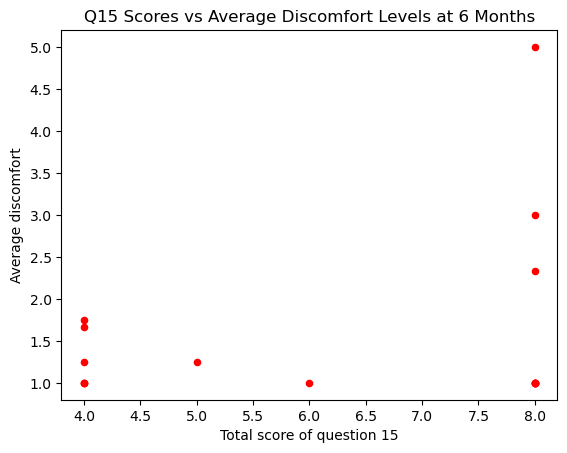

In [ ]:
ax1 = month_6.plot.scatter(y='DISCOMFORT_SLIDER', x='total_score', 
                           ylabel='Average discomfort',
                           xlabel='Total score of question 15',
                           title='Q15 Scores vs Average Discomfort Levels at 6 Months',
                         color = 'r')


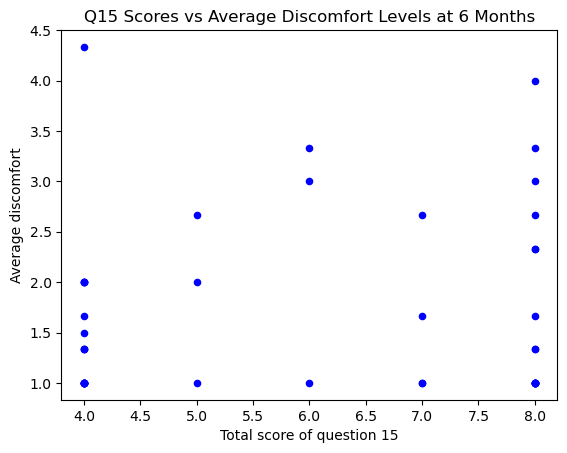

In [ ]:
ax2 = month_1.plot.scatter(y='DISCOMFORT_SLIDER', x='total_score', 
                           ylabel='Average discomfort',
                           xlabel='Total score of question 15',
                           title='Q15 Scores vs Average Discomfort Levels at 6 Months',
                         color = 'b')

In [1]:
from matplotlib.pyplot import cm

#print(month_1.index.values.tolist())
n = len(month_6.index.values.tolist())

id_color = []

color = iter(cm.rainbow(np.linspace(0, 1, n)))
for i in month_6.index.values.tolist():
    c = next(color)
    id_color.append(c)
    

ax1 = month_6.plot.scatter(x='total_score', y='DISCOMFORT_SLIDER',
                           xlabel='Total score of question 15', ylabel='Average discomfort',
                           title='Q15 Scores vs Average Discomfort Levels at 6 Months')


NameError: ignored